# Projeto de estudo: análise de dados de uma cafeteria ☕

Este notebook foi desenvolvido para consolidar e aplicar conhecimentos na área de análise de dados, utilizando como estudo de caso uma cafeteria fictícia com operações em três locais de Nova York. A proprietária da cafeteria nos procurou com o objetivo de obter suporte para tomadas de decisão estratégicas.

Nosso papel será analisar os dados disponíveis, explorar padrões de comportamento dos clientes e identificar insights valiosos que possam orientar ações e melhorar o desempenho do negócio. Ao longo deste projeto, vamos:

- Investigar o desempenho de vendas por categorias de produtos, horários e lojas.
- Analisar tendências de consumo e preços.
- Gerar hipóteses e recomendações para maximizar faturamento e eficiência.


#### Descrição dos Dados
Os dados utilizados neste projeto representam transações realizadas nas três lojas. Embora os dados estejam em inglês, explicarei os principais termos e categorias conforme necessário. Cada registro no dataset corresponde a uma transação e inclui as seguintes informações:

- transaction_id: Identificação única e sequencial de cada transação.
- transaction_date: Data em que a transação foi realizada (formato MM/DD/AA).
- transaction_time: Horário em que a transação foi realizada (formato HH:MM:SS).
- transaction_qty: Quantidade de itens vendidos na transação.
- store_id: Identificação única da loja onde ocorreu a transação.
- store_location: Localização da loja onde ocorreu a transação.
- product_id: Identificação única do produto vendido.
- unit_price: Preço de varejo do produto vendido.
- product_category: Categoria à qual o produto pertence (ex.: Coffee, Bakery).
- product_type: Tipo de produto dentro da categoria (ex.: Gourmet brewed coffee).
- product_detail: Descrição detalhada do produto.

Por meio dessa abordagem, buscamos não apenas resolver desafios específicos do negócio, mas também reforçar habilidades essenciais em análise de dados, como manipulação, visualização e interpretação. Vamos começar? 

### Importando as bibliotecas e o dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Coffee Shop Sales.xlsx")

### Explorando informações iniciais

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [4]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [5]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [6]:
df.duplicated().sum()

0

Foi verificado que não existem dados nulos ou repetidos, não sendo necessário, por enquanto, excluir ou modificar dados.

## Explorando os dados

A seguir, vamos iniciar nossa análise verificando algumas medidas estatísticas

In [7]:
df.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


In [8]:
df["transaction_total"] = df["transaction_qty"] * df["unit_price"]
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_total
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2


Adicionamos a coluna "transaction_total" que calcula o valor total da transação com base no preço unitário e na quantidade de produto que foi vendida, dessa forma, poderemos verificar, futuramente, o faturamento da empresa.

In [9]:
df.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price,transaction_total
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219,4.686367
std,43153.600016,0.542509,2.074241,17.930020,2.658723,4.227099
min,1.000000,1.000000,3.000000,1.000000,0.800000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000,3.000000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000,3.750000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000,6.000000
max,149456.000000,8.000000,8.000000,87.000000,45.000000,360.000000


Com base na tabela, conseguimos fazer algumas observações: 

- A quantidade de produtos em cada transação, em média, varia entre 1 e 2
- O preço de cada produto é de, em média, 3.38, porém com uma variação maior, sendo o produto mais caro o que custa 45.00 e o mais barato custando 0.80. 
- O preço total de cada transação possui certa variação, sendo que 75% das transações não ultrapassam os 6.0

Para melhorar a visualização dos dados, plotaremos um histograma do total de cada transação

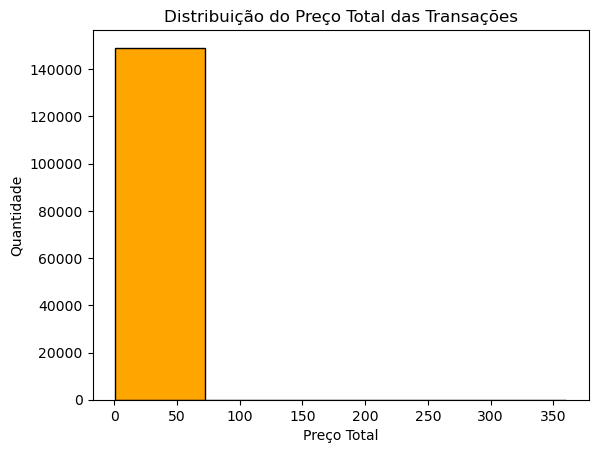

In [187]:
plt.hist(df['transaction_total'], bins=5, color='orange', edgecolor='black')
plt.title('Distribuição do Preço Total das Transações')
plt.xlabel('Preço Total')
plt.ylabel('Quantidade')
plt.show()

### Refletindo sobre o comportamento do consumidor

Após a análise inicial, fiz algumas hipóteses e também anotei algumas dúvidas: 

- Pelo valor total das transações, pode ser que o público tenha um valor de compras de moderado para baixo 
- A variação no valor das transações pode ser por existirem produtos de nichos específicos, como de categoria "Premium" ou "Gourmet"
- Uma parte significativa das transações fica abaixo de 3.0, podendo haver a possibilidade de serem produtos promocionais que fazem sucesso em alguma das lojas. 
----

- Quais produtos em quais lojas vendem mais? 
- Existe alguma relação entre o aumento na quantidade de vendas com o dia da semana e o horário? 
- Como foram as vendas da cafeteria no ano? 

A seguir, vamos criar algumas visualizações mais detalhadas para entender melhor esse comportamento.

## Visualizações 

### Análise da quantidade de vendas 

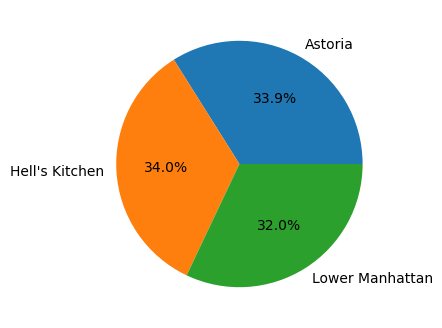

In [142]:
#Porcentagem de vendas de cada loja

transaction_counts = df.groupby('store_location')['transaction_id'].count()

plt.figure(figsize=(6, 4))
plt.pie(transaction_counts,  autopct='%1.1f%%', labels=transaction_counts.index)

plt.show()

📑 Apesar da loja "Hells Kitchen" possuir o maior número de vendas, não há diferença significativa na quantidade de transações que ocorrem em cada loja. 

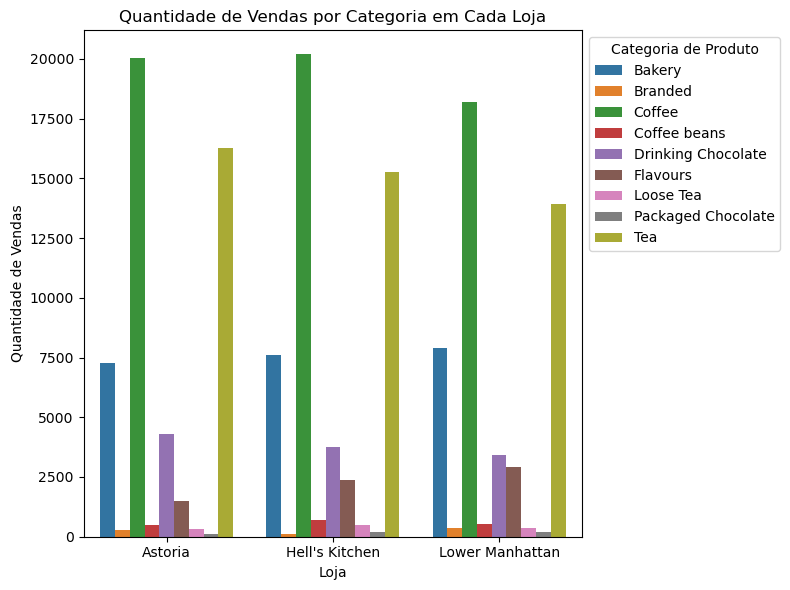

In [72]:
plt.figure(figsize=(8, 6))

product_category_by_store = df.groupby(['store_location', 'product_category'])["transaction_id"].count().reset_index()

sns.barplot(data=product_category_by_store, x='store_location', y='transaction_id', hue='product_category')

plt.title('Quantidade de Vendas por Categoria em Cada Loja')
plt.xlabel('Loja')
plt.ylabel('Quantidade de Vendas')

plt.legend(title='Categoria de Produto', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()


- Nota-se que os produtos com maior quantidade de vendas ficam nas categorias "Coffee" e "Tea", em todas as lojas. 
- Os produtos da categoria "Flavours" aparecem em quantidades consideravelmente maiores nas lojas "Lower Manhattan" e "Hells Kitchen", embora a quantidade de vendas seja consideravelmente pequena. 

In [143]:
#Convertendo a coluna de data
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

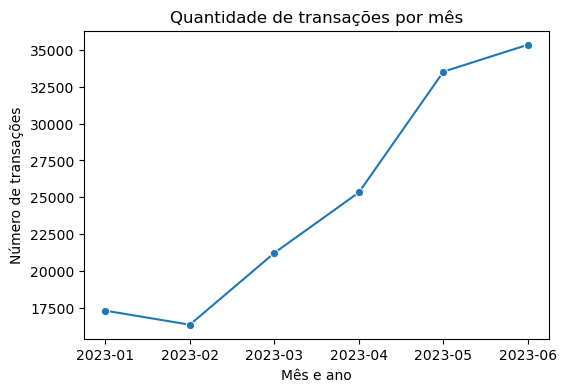

In [14]:
df["year_month"] = df["transaction_date"].dt.to_period("M").astype(str)

transactions_by_month = df.groupby("year_month")["transaction_id"].count().reset_index()

plt.figure(figsize=(6, 4))
sns.lineplot(data=transactions_by_month, x="year_month", y="transaction_id", marker="o")
plt.title("Quantidade de transações por mês")
plt.xlabel("Mês e ano")
plt.ylabel("Número de transações")

plt.show()

📑 O gráfico mostra a quantidade de transações nas três lojas ao longo do primeiro semestre de 2023. Logo de início, nota-se uma pequena queda no mês de fevereiro seguida de um aumento considerável nos meses seguintes. 

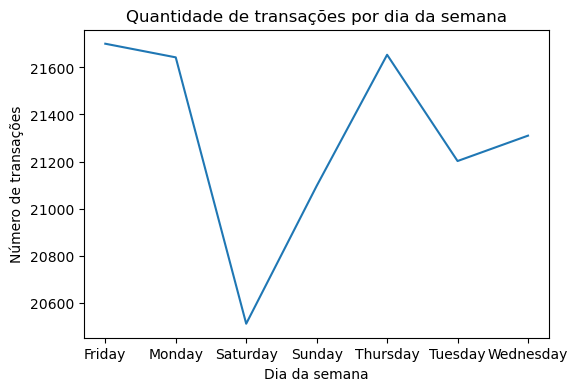

In [15]:
df["day_week"] = df["transaction_date"].dt.day_name()

transactions_day_week = df.groupby("day_week")["transaction_id"].count().reset_index()

plt.figure(figsize=(6,4))
sns.lineplot(data=transactions_day_week, x="day_week", y="transaction_id")

plt.title("Quantidade de transações por dia da semana")
plt.xlabel("Dia da semana")
plt.ylabel("Número de transações")

plt.show()

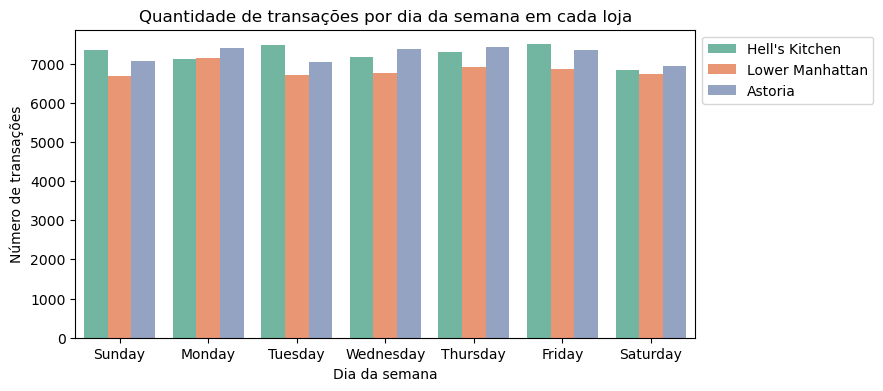

In [144]:
df["day_week"] = df["transaction_date"].dt.day_name()

transactions_by_store_day_week = df.groupby(["day_week", "store_location"])["transaction_id"].count().reset_index()

day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
transactions_by_store_day_week["day_week"] = pd.Categorical(transactions_by_store_day_week["day_week"], categories=day_order, ordered=True)

transactions_by_store_day_week = transactions_by_store_day_week.sort_values("day_week")

plt.figure(figsize=(8,4))
sns.barplot(data=transactions_by_store_day_week, x="day_week", y="transaction_id", hue="store_location", palette="Set2")

plt.title("Quantidade de transações por dia da semana em cada loja")
plt.xlabel("Dia da semana")
plt.ylabel("Número de transações")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 

plt.show()

📑 Embora sábado seja um dia com menor movimentação nas três lojas, a variação ainda é consideravelmente pequena, sendo a Lower Manhattan a loja que possui menos vendas nos dias em geral, especialmente aos sábados e domingos quando comparada à "Hells Kitchen" e "Astoria"

In [135]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S')

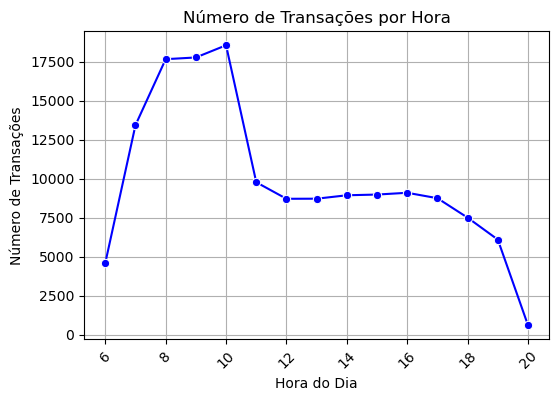

In [138]:
# Transações por hora

df['hour'] = df['transaction_time'].dt.hour
transactions_per_hour = df.groupby('hour')['transaction_id'].count().reset_index(name='transaction_count')

plt.figure(figsize=(6, 4))
sns.lineplot(x='hour', y='transaction_count', data=transactions_per_hour, marker='o', color='b')
plt.title('Número de Transações por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Transações')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

📑 Em média, os picos de venda ocorrem entre 8h e 10h da manhã, seguidos de uma baixa até o 12h, onde as vendas se mantém relativamente constantes até uma nova queda a partir das 18h. 

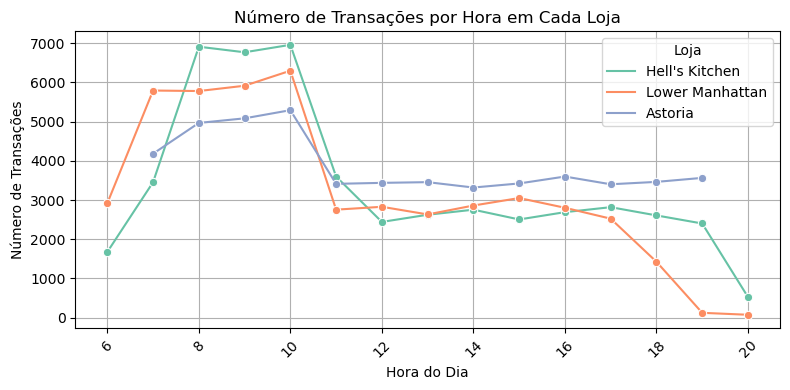

In [140]:
#Transações por hora em cada loja

df['hour'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.hour
transactions_per_hour_per_store = df.groupby(['hour', 'store_location'])['transaction_id'].count().reset_index(name='transaction_count')

plt.figure(figsize=(8, 4))
sns.lineplot(x='hour', y='transaction_count', hue='store_location', data=transactions_per_hour_per_store, marker='o', palette='Set2')
plt.title('Número de Transações por Hora em Cada Loja')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Transações')
plt.xticks(rotation=45)
plt.legend(title='Loja')
plt.grid(True)
plt.tight_layout()
plt.show()

📑 Há uma queda significativa nas vendas a partir das 17h nas lojas, exceto em "Astoria" que consegue se manter na faixa de 3000 mil transações. 

### Visualizações: análise do faturamento 

Ao somar o valor de todas as transações, obtemos um total de U$ 698.812,33. 
Para entendermos melhor o faturamento total e o faturamento de cada loja, vamos explorar em mais detalhes as visualizações a seguir. 

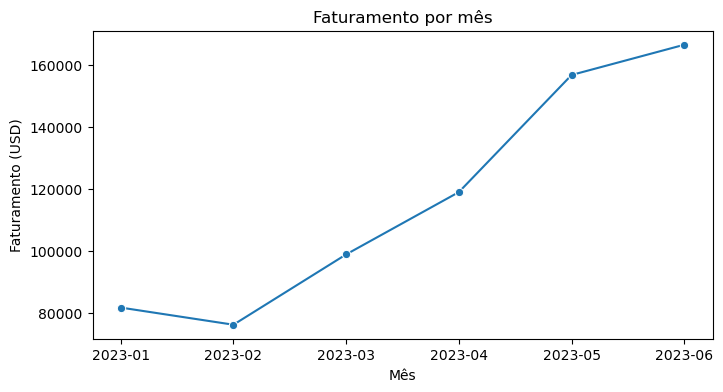

In [18]:
revenue_by_month = df.groupby("year_month")["transaction_total"].sum().reset_index()
revenue_by_month

plt.figure(figsize=(8,4))
sns.lineplot(data=revenue_by_month, x="year_month", y="transaction_total", marker="o")

plt.title("Faturamento por mês")
plt.xlabel("Mês")
plt.ylabel("Faturamento (USD)")

plt.show()

📑 Assim como observamos no gráfico de quantidade de vendas por mês, aqui também observa-se uma pequena queda no mês de fevereiro em relação ao faturamento, seguido de um aumento considerável. 

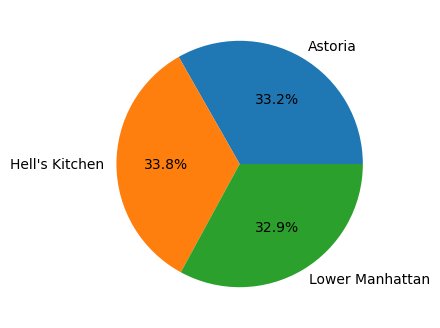

In [36]:
#Farturamento por loja

revenue_by_store = df.groupby("store_location")["transaction_total"].sum()
plt.figure(figsize=(8,4))
plt.pie(revenue_by_store.values,  autopct='%1.1f%%', labels=revenue_by_store.index)

plt.show()

📑 As três lojas se mantem bem equilibradas no faturamento total, sendo Hells Kitchen responsável pela maior parte, cerca de 34%.

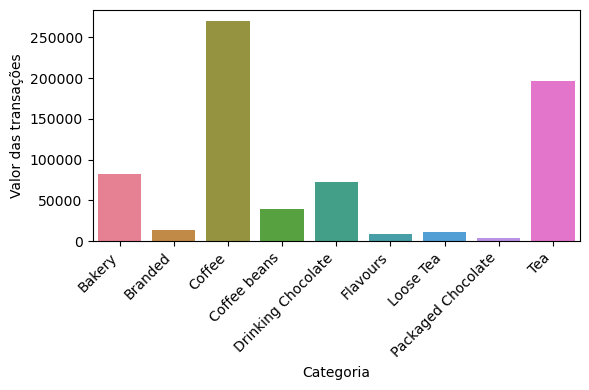

In [59]:
#Faturamento por categoria de produto 

revenue_by_product_category = df.groupby("product_category")["transaction_total"].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(revenue_by_product_category, x="product_category", y="transaction_total", palette="husl")

plt.xlabel("Categoria")
plt.ylabel("Valor das transações")

plt.xticks(rotation=45, ha="right")

plt.tight_layout() 

plt.show()

📑 Nota-se que os produtos mais vendidos se encontram nas categorias "Coffee", "Tea" e "Bakery", respectivamente, sendo "Coffee" a categoria responsável pelo maior valor de faturamento. 

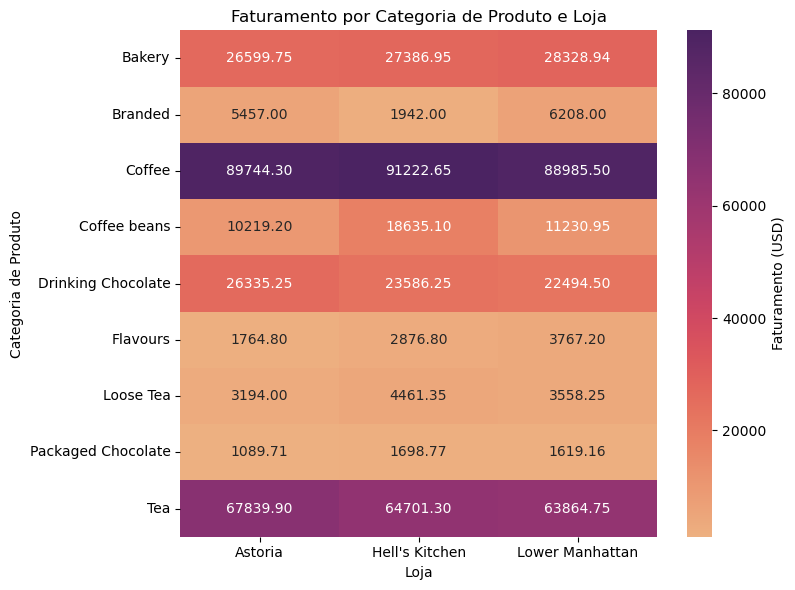

In [95]:
# Faturamento por categoria de produto em cada loja

revenue_by_category_and_store = df.groupby(["product_category", "store_location"])["transaction_total"].sum().reset_index()
revenue_by_category_and_store

plt.figure(figsize=(8,6))
data = revenue_by_category_and_store.pivot(index="product_category", 
                                           columns="store_location",
                                          values="transaction_total")

sns.heatmap(data, annot=True, fmt=".2f", cmap="flare", cbar_kws={'label': 'Faturamento (USD)'} )

plt.title("Faturamento por Categoria de Produto e Loja")
plt.xlabel("Loja")
plt.ylabel("Categoria de Produto")
plt.tight_layout()
plt.show()

📑 Podemos observar que os produtos possuem vendas semelhantes nas três lojas, com pequenas variações, como no caso das principais categorias (Coffee, Tea, Bakery). 
Em destaque está a categoria "Coffee Beans", com um faturamento consideravelmente maior na loja "Hells Kitchen".

In [150]:
#Verificando quantos produtos existem no DF
df["product_type"].unique()

array(['Gourmet brewed coffee', 'Brewed Chai tea', 'Hot chocolate',
       'Drip coffee', 'Scone', 'Barista Espresso', 'Brewed Black tea',
       'Brewed Green tea', 'Brewed herbal tea', 'Biscotti', 'Pastry',
       'Organic brewed coffee', 'Premium brewed coffee', 'Regular syrup',
       'Herbal tea', 'Gourmet Beans', 'Organic Beans', 'Sugar free syrup',
       'Drinking Chocolate', 'Premium Beans', 'Chai tea', 'Green beans',
       'Espresso Beans', 'Green tea', 'Organic Chocolate', 'Housewares',
       'Black tea', 'House blend Beans', 'Clothing'], dtype=object)

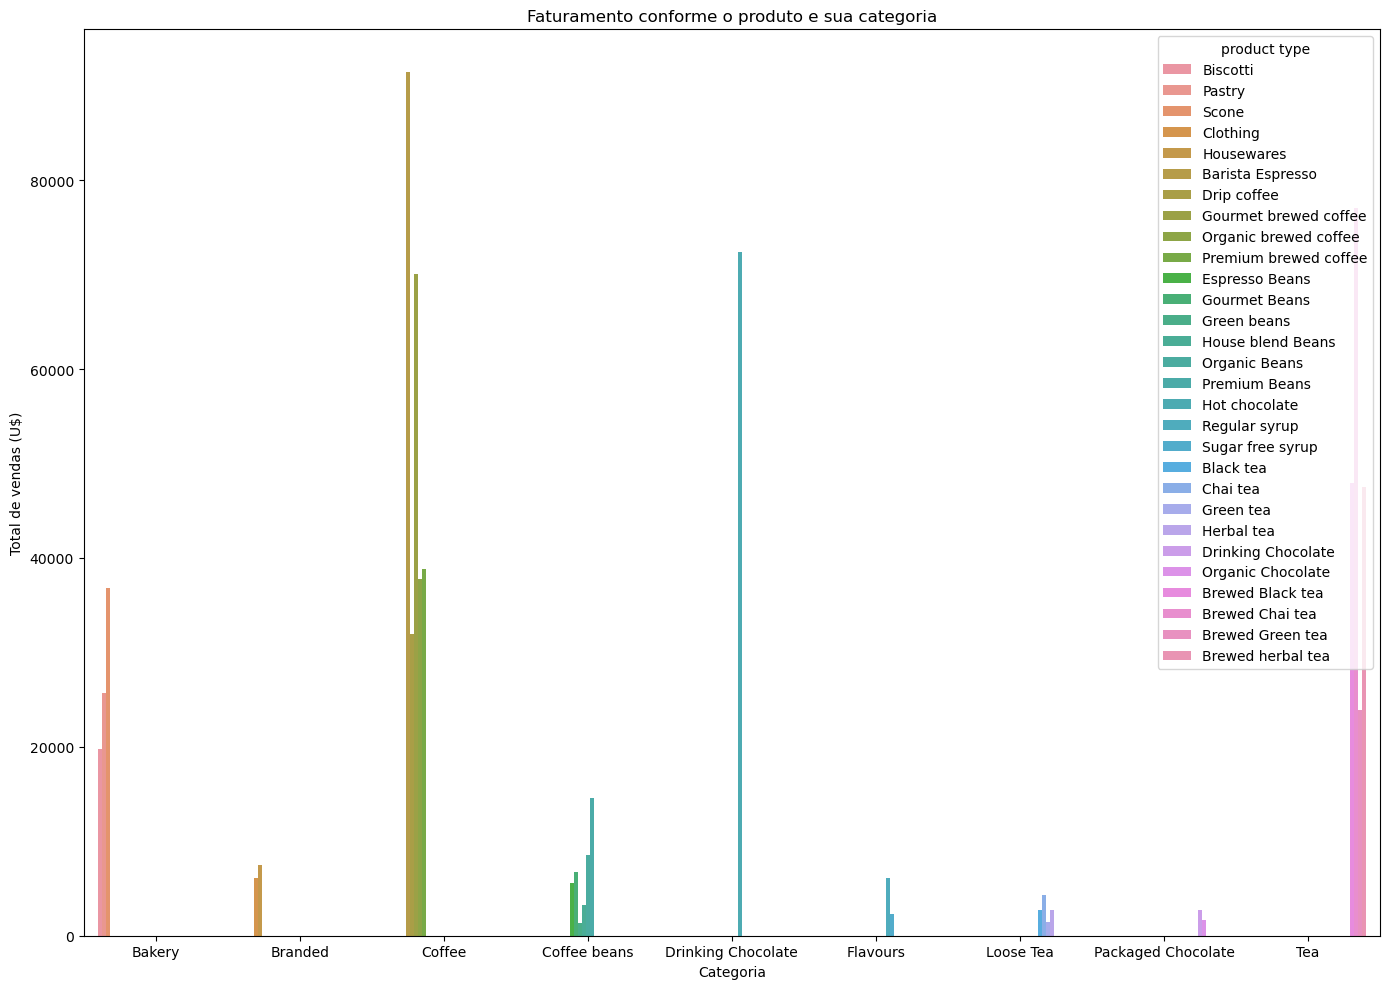

In [188]:
product_sales_df = df.groupby(['product_category', 'product_type']) ['transaction_total'].sum().reset_index()
product_sales_df

plt.figure(figsize=(14,10))
sns.barplot(data= product_sales_df, x='product_category',y='transaction_total', hue='product_type')

plt.title('Faturamento conforme o produto e sua categoria')

plt.xlabel("Categoria")
plt.ylabel("Total de vendas (U$)")
plt.legend(title = 'product type', loc = 'upper right')

plt.tight_layout()
plt.show()

In [190]:
#Produtos menos vendidos por mês

sales_by_category_and_month = df.groupby(["year_month", "product_type"])["transaction_id"].count().reset_index()

least_selling_products_by_month = sales_by_category_and_month.loc[
    sales_by_category_and_month.groupby("year_month")["transaction_id"].idxmin()
]

In [154]:
#Produtos mais vendidos por mês

sales_by_category_and_month = df.groupby(["year_month", "product_type"])["transaction_id"].count().reset_index()

top_selling_products_by_month = sales_by_category_and_month.loc[
    sales_by_category_and_month.groupby("year_month")["transaction_id"].idxmax()
]

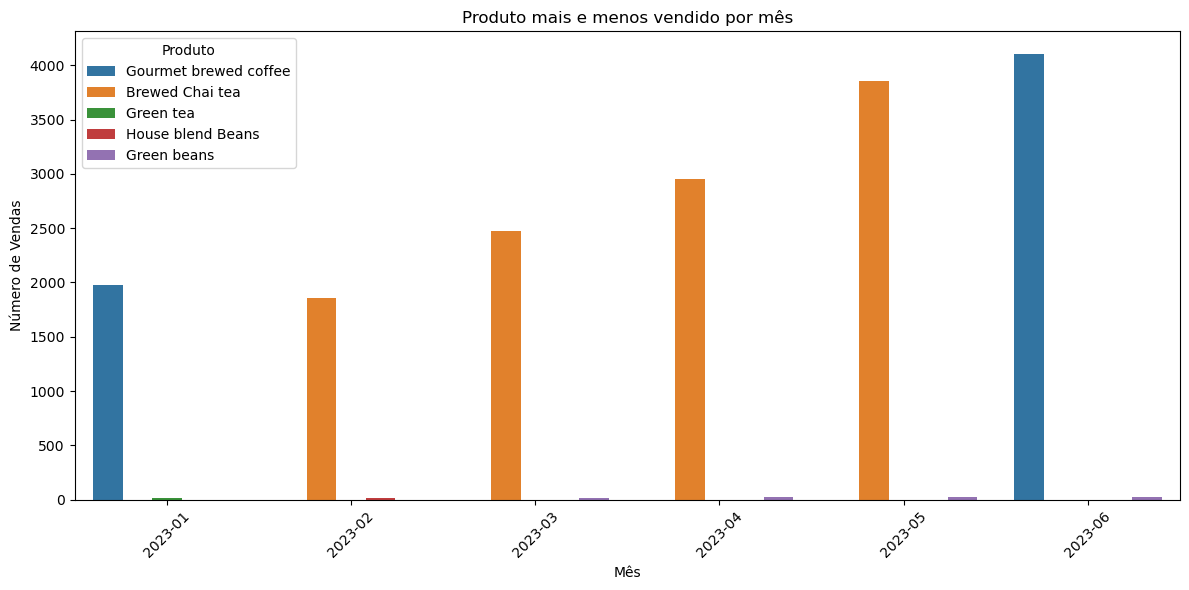

In [156]:
most_and_least_selling_products = pd.concat(
    [top_selling_products_by_month.assign(Type="Mais Vendido"),
     least_selling_products_by_month.assign(Type="Menos Vendido")]
)

most_and_least_selling_products = most_and_least_selling_products.rename(
    columns={"transaction_id": "Vendas"}
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=most_and_least_selling_products,
    x="year_month",
    y="Vendas",
    hue="product_type",
    dodge=True
)

plt.title("Produto mais e menos vendido por mês")
plt.xlabel("Mês")
plt.ylabel("Número de Vendas")
plt.xticks(rotation=45)
plt.legend(title="Produto", loc='upper left')
plt.tight_layout()

plt.show()

📑 Nota-se que o "Brewed Chai tea" apresentou a quantidade maior de vendas durante quatro meses seguidos, sendo o produto mais vendidos no semestre. Dentre os menos vendidos, o produto "Green Beans aparece 4x consecutivamente. 

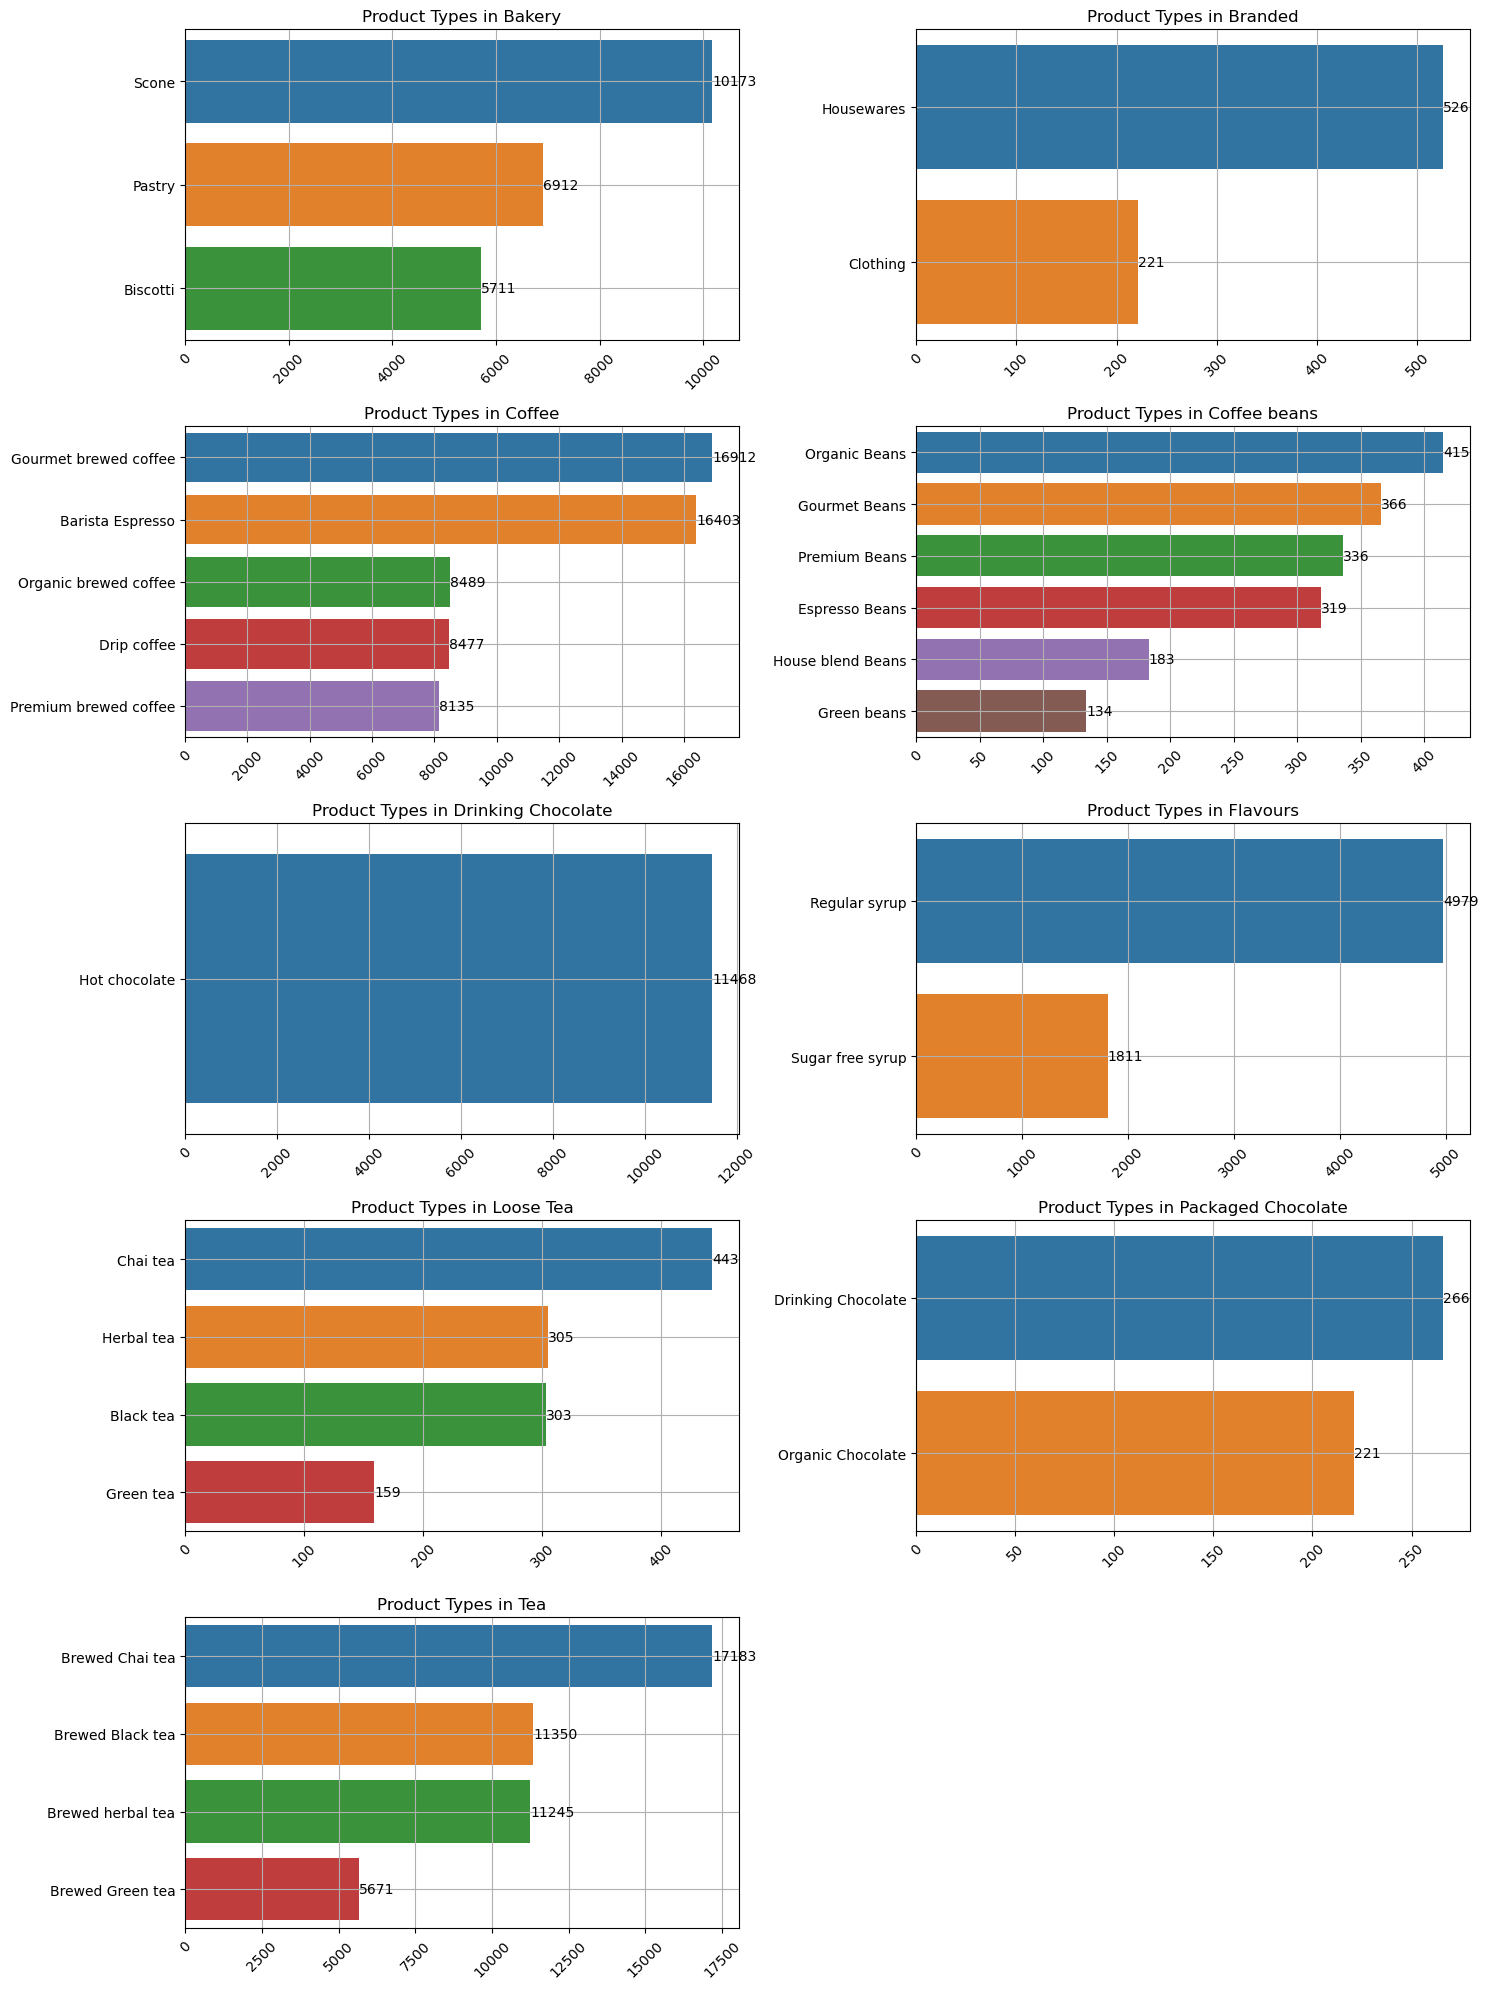

In [151]:
# Comparando a quantidade de produtos em cada categoria

counts = df.groupby(["product_category", "product_type"]).size().reset_index(name = "count")
categories = counts['product_category'].unique()

fig, axes = plt.subplots(5, 2, figsize = (15, 20))

axes = axes.flatten()

for i, category in enumerate(categories):
    
    subset = counts[counts['product_category'] == category]
    
    subset = subset.sort_values('count', ascending = False)
    
    sns.barplot(x = 'count', y = 'product_type', data = subset, ax = axes[i], order = subset['product_type'])
    axes[i].set_title(f'Product Types in {category}')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis = 'x', rotation = 45)
    axes[i].grid(True)
    
    for idx, bar in enumerate(axes[i].patches):
        axes[i].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, subset.iloc[idx]['count'], ha = 'left', va = 'center')

for j in range(len(categories), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

📑 Em resumo, a categoria "Coffee" possui a maior quantidade de produtos vendidos, sendo o "Gourmet Brewed" e o "Barista Espresso" os campeões em vendas. 
Já na categoria "Tea", o "Brewed Chai" aparece com bons resultados em vendas, seguidos dos chás "Black" e "Herbal" que quase empatam na quantidade. 
Nas categorias que menos vendem produtos, temos "Package chocolate" com apenas dois produtos que, juntos, não ultrapassam as 500 vendas. 

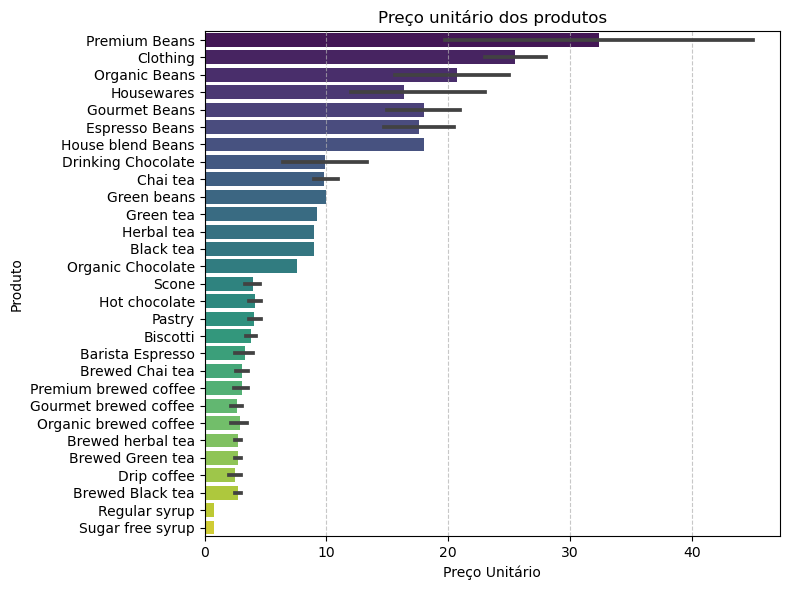

In [193]:
#Gráfico que mostra o preço unitário dos produtos
product_price_data = df[['product_type', 'unit_price']].drop_duplicates().sort_values(by='unit_price', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='unit_price', y='product_type', data=product_price_data, palette='viridis')
plt.title('Preço unitário dos produtos')
plt.xlabel('Preço Unitário')
plt.ylabel('Produto')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

📑 Ao organizar os produtos do mais caro para o mais barato, encontramos o "Premium Beans" no topo, custando U$ 35.00 e o "Sugar free syrup" por último, custando menos de 1 dólar. 

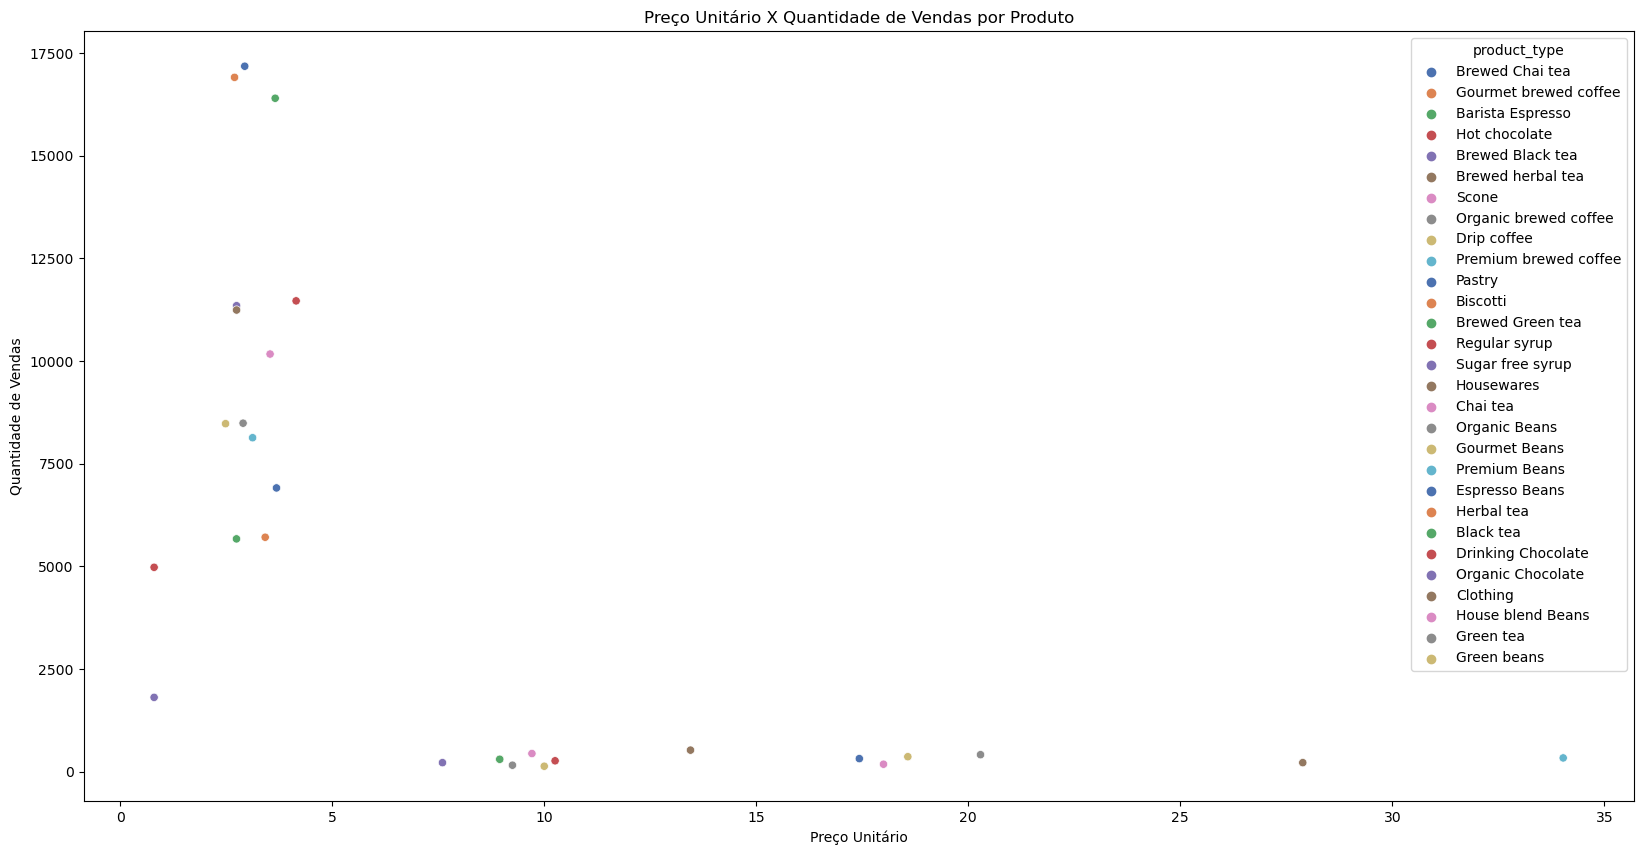

In [182]:
product_sales = df.groupby("product_type").agg(
    unit_price=("unit_price", "mean"), 
    total_sales=("transaction_id", "count")
).reset_index()

product_sales = product_sales.sort_values(by="total_sales", ascending=False)

f, ax = plt.subplots(figsize=(20,10))

sns.scatterplot(data=product_sales, x="unit_price", y="total_sales", hue="product_type", palette="deep")

plt.title("Preço Unitário X Quantidade de Vendas por Produto")

plt.xlabel("Preço Unitário")
plt.ylabel("Quantidade de Vendas")

plt.show()

📑 Comparando os preços unitários com a quantidade de vendas, nota-se que a faixa de preço dos produtos mais vendidos fica entre 0.80 e 5 dólares, com destaque para o "Brewed Chai Tea" que, custando em torno de 3.00, foi o campeão de vendas. Nota-se também que a partir dos U$ 5.00, a quantidade de vendas diminui de maneira significativa, ficando abaixo de 1000 transações.

## Resumo & insights 📊

Aqui vai um resumo das principais observações que fiz ao longo dos estudos: 

- Os dados de transações são, exclusivamente, do primeiro semestre de 2023
- O pico de vendas nas três lojas ocorre, em média, entre 8h e 10h da manhã 
- A maioria das vendas possui de um a dois produtos 
- O preço unitário dos produtos gira em torno de 3.40, sendo o mais caro o "Premium Beans", custando 35.00 e o Sugar Free Syrup o mais abrato, custando 0.80. A variação é esperada devido aos diferentes tipos de café. 
- A quantidade de produtos em cada transação, em média, varia entre 1 e 2
- 75% das transações não ultrapassam os 6.0 
- As categorias que mais vendem produtos são "Coffee", "Tea" e "Bakery", enquanto "Package Chocolate" é a categoria de menor venda. 
- As três lojas possuem um equilíbrio na quantidade de vendas e faturamento, sendo a Hell's Kitchen responsável pela maior parcela de faturamento (cerca de 34%). 
- O faturamento de cada loja foi de: 
    - Astoria 232243.91 
    - Hell's Kitchen 236511.17
    - Lower Manhattan 230057.25
- Somadas, as três lojas faturaram cerca de 698.812,33. 

Com base nos dados, consegui pensar em algumas hipóteses e insights que poderão ser validados com mais estudos e informações: 

- Embora a maioria das transações esteja numa faixa de valores mais baixa, a quantidade de vendas é relativamente alta, o que pode demonstrar um público com padrão de consumo moderado. 
- Produtos mais caros, como "Premium Beans" podem estar sendo direcionados para públicos mais nichados e, nesse cenário, a baixa margem de venda pode ser compensada pelo valor. 
- Produtos muito baratos, como o "Sugar Free Syrup" podem ser mais direcionados para agregar vendas maiores. 
- Produtos como Organic Chocolate, Drinking Chocolate, Black Tea, Herbal Tea e Brewwed Black Tea, apesar dos preços consideravelmente baixos, possuem um volume de vendas relativamente baixo, o que pode indidcar serem produtos muito nichados ou falta de popularidade.

In [194]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_total,year_month,day_week,hour
0,1,2023-01-01,1900-01-01 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01,Sunday,7
1,2,2023-01-01,1900-01-01 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01,Sunday,7
2,3,2023-01-01,1900-01-01 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01,Sunday,7
3,4,2023-01-01,1900-01-01 07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01,Sunday,7
4,5,2023-01-01,1900-01-01 07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01,Sunday,7


In [195]:
df.to_csv('coffee_sales_2023_1sem.csv', index=False)